# *Regression*

* Regression analysis is a form of predictive modelling technique which investigates the relation between a dependent and a independent variable.

## *Uses of Regression* 

* Determining the strength of predictors
* Forecasting an effect
* Trend forecasting

# *Difference between linear and logistic regression*
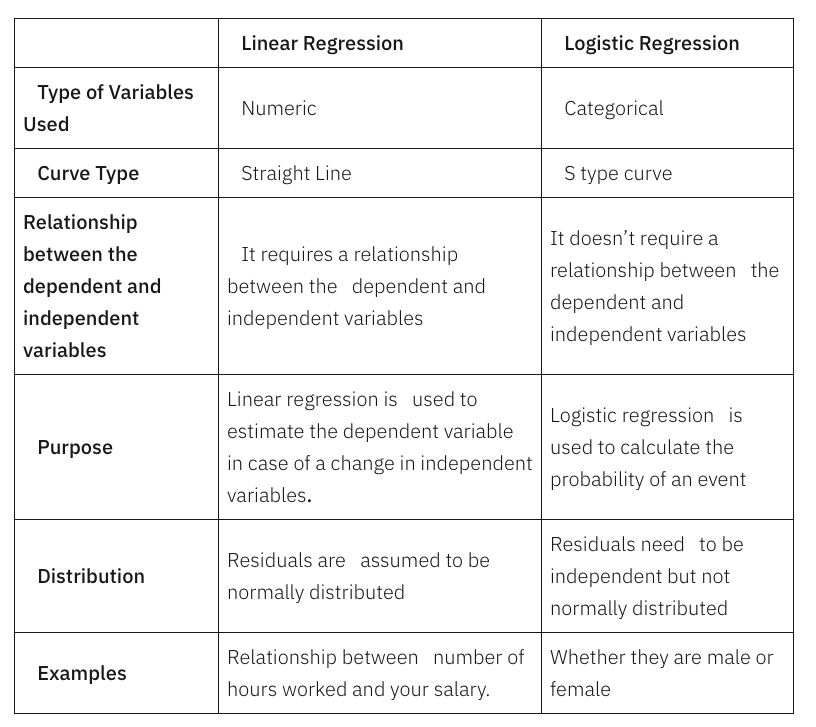

# *When to use linear regression ?*

* Classification and regression capabilities
    - The linear regression is not good for classification models.
* Data quality 
* Computational complexity 
    -  Linear regression is not computationally expensive as compared to the decision tree or clustering algorithm
* Comprehensible and transparent

# *Where to use linear regression ? / Application*

* Evaluating trends and sales estimates
* Analyzing the impact of price changes
* Assessment of risk in financial services and insurance domain

![title](img/pic1.png)

* Linear regression consists of finding the best-fitting straight line through the points. The best-fitting line is called a regression line.

# *Goodness of fit*

## *R-Square* 

* It is a statistical measure of how close the data are to the fitted regression line.
* also known as coefficient of determination or the coefficient of multiple determination.

![title](img/pic3.png)
![title](img/pic4.png)
![title](img/pic5.png)
![title](img/pic6.png)

## *LR algorithm using Python from scratch*

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading data
data = pd.read_csv('DailyDelhiClimate.csv')
print(data.shape)
data.head()

(114, 5)


,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2017,15.913043,85.869565,2.743478,59.000000
1,02-01-2017,18.500000,77.222222,2.894444,1018.277778
2,03-01-2017,17.111111,81.888889,4.016667,1018.333333
3,04-01-2017,18.700000,70.050000,4.545000,1015.700000
4,05-01-2017,18.388889,74.944444,3.300000,1014.333333


In [13]:
#Collecting X and Y
X = data['meantemp'].values
Y = data['humidity'].values

In [14]:
# Mean X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)

# Total number of values
m=len(X)

# Using the formula to calculate b1 and b2
numer=0
denom=0

for i in range(m):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)

# Print coefficients
print(b1,b0)

-2.571542446683694 112.09446592884265


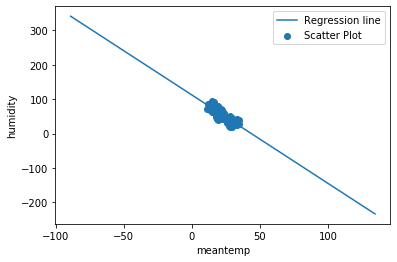

In [17]:
# Plotting values and regression values

max_x=np.max(X)+100
min_x=np.min(X)-100

#Calculating line values x and y
x=np.linspace(min_x,max_x,1000)
y= b0 + b1*x

# Plotting lines
plt.plot(x,y,label='Regression line')
# Plotting scatter points
plt.scatter(X,Y,label='Scatter Plot')
plt.xlabel('meantemp')
plt.ylabel('humidity')
plt.legend()
plt.show()

In [18]:
# Good fit - R square
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t += (Y[i]-mean_y) **2
    ss_r += (Y[i]-y_pred) **2
r2=1-(ss_r/ss_t)
print(r2)

0.7356942771011626


## *LR algorithm using Python (scikit lib)*

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use rank 1 matrix in scikit learn
X=X.reshape((m,1))
# Creating Model
reg= LinearRegression()
# Fitting the training data
reg= reg.fit(X,Y)
# Y prediction
Y_pred= reg.predict(X)
# Calculating R2 score
r2_score=reg.score(X,Y)
print(r2_score)

0.7356942771011625
